In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:/Users/vasan/Desktop/Python/Linear_Regression/SPY_regression.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,07-12-2015,2090.419922,2090.419922,2066.780029,2077.070068,4043820000,2077.070068
1,04-12-2015,2051.239990,2093.840088,2051.239990,2091.689941,4214910000,2091.689941
2,03-12-2015,2080.709961,2085.000000,2042.349976,2049.620117,4306490000,2049.620117
3,02-12-2015,2101.709961,2104.270020,2077.110107,2079.510010,3950640000,2079.510010
4,01-12-2015,2082.929932,2103.370117,2082.929932,2102.629883,3712120000,2102.629883
...,...,...,...,...,...,...,...
1488,08-01-2010,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1144.979980
1489,07-01-2010,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1141.689941
1490,06-01-2010,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1137.140015
1491,05-01-2010,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1136.520020


In [3]:
df.shape

(1493, 7)

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
# Change the Date column from object to datetime object 
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1493.000000
mean,1564.805712,1573.101540,1556.045962,1565.370924,3.778865e+09,1565.370924
std,344.474195,344.719565,344.233831,344.453792,8.865364e+08,344.453792
min,1027.650024,1032.949951,1010.909973,1022.580017,5.362000e+08,1022.580017
25%,1277.030029,1283.930054,1267.400024,1277.300049,3.252780e+09,1277.300049
50%,1459.369995,1462.430054,1452.060059,1459.369995,3.673450e+09,1459.369995
75%,1911.770020,1927.209961,1902.010010,1913.849976,4.214910e+09,1913.849976
max,2130.360107,2134.719971,2126.060059,2130.820068,1.061781e+10,2130.820068


In [7]:
# Set Date as index
df.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
df.sort_values('Date',ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-02,1073.890015,1089.380005,1073.890015,1089.189941,4077610000,1089.189941
2010-01-03,1105.359985,1116.109985,1105.359985,1115.709961,3847640000,1115.709961
2010-01-04,1171.229980,1181.430054,1170.689941,1178.099976,4006870000,1178.099976
2010-01-06,1087.300049,1094.770020,1069.890015,1070.709961,5271480000,1070.709961
2010-01-07,1031.099976,1033.579956,1010.909973,1027.369995,6435770000,1027.369995
...,...,...,...,...,...,...
2015-12-05,2102.870117,2105.060059,2085.570068,2099.120117,3139520000,2099.120117
2015-12-06,2107.429932,2107.429932,2091.330078,2094.110107,2719400000,2094.110107
2015-12-08,2081.100098,2089.060059,2052.090088,2086.050049,4269130000,2086.050049


In [8]:
#create features
#High - Low percent change
#5 periods Exponential Moving Average
#Standard deviation of the price over the past 30 days
#Daily volume percent change
#Average volume for the past 5 days
#Volume over close price ratio

df['High-Low_pct'] = (df['High'] - df['Low']).pct_change()
df['ewm_5'] = df["Close"].ewm(span=5).mean().shift(periods=1)
df['price_std_5'] = df["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
df['volume Change'] = df['Volume'].pct_change()
df['volume_avg_5'] = df["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
df['volume Close'] = df["Volume"].rolling(center=False,window=5).std().shift(periods=1)

In [9]:
df.head(5)

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-07-12,2090.419922,2090.419922,2066.780029,2077.070068,4043820000,2077.070068,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-12,2051.239990,2093.840088,2051.239990,2091.689941,4214910000,2091.689941,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-03-12,2080.709961,2085.000000,2042.349976,2049.620117,4306490000,2049.620117,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-02-12,2101.709961,2104.270020,2077.110107,2079.510010,3950640000,2079.510010,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-01-12,2082.929932,2103.370117,2082.929932,2102.629883,3712120000,2102.629883,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1493.000000,1492.000000,1492.000000,1463.000000,1492.000000,1.488000e+03,1.488000e+03
mean,1564.805712,1573.101540,1556.045962,1565.370924,3.778865e+09,1565.370924,0.158718,1566.920405,26.878132,0.022067,3.777967e+09,4.656036e+08
std,344.474195,344.719565,344.233831,344.453792,8.865364e+08,344.453792,0.669338,344.199152,11.884924,0.253517,7.298216e+08,3.163527e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,5.362000e+08,1022.580017,-0.825131,1036.820910,10.183409,-0.815639,1.400956e+09,2.151913e+07
25%,1277.030029,1283.930054,1267.400024,1277.300049,3.252780e+09,1277.300049,-0.317325,1279.118725,19.214563,-0.087939,3.313955e+09,2.523825e+08
50%,1459.369995,1462.430054,1452.060059,1459.369995,3.673450e+09,1459.369995,-0.007848,1453.046612,23.988577,0.001130,3.707287e+09,3.651298e+08
75%,1911.770020,1927.209961,1902.010010,1913.849976,4.214910e+09,1913.849976,0.460769,1925.198519,30.627758,0.098145,4.080236e+09,5.908197e+08
max,2130.360107,2134.719971,2126.060059,2130.820068,1.061781e+10,2130.820068,3.981509,2126.033614,79.267522,4.916374,8.075016e+09,2.336683e+09


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

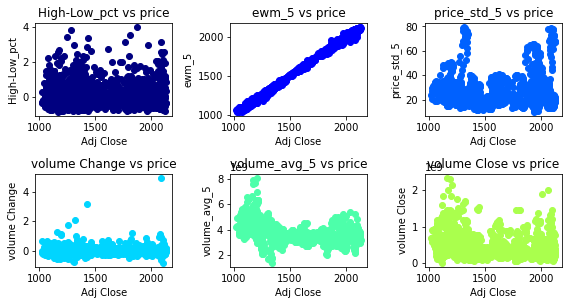

In [11]:
#visualize correlation between features & y
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the df which are the model features
variables = df.columns[-6:]  
 
correlation(df,variables,3,3)

In [12]:
#correlation between adj_close & features
df.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [13]:
# see for missing values
df.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

In [14]:
# To train the model it is necessary to drop any missing value in the dataset.
# axis=0 denotes rows
df = df.dropna(axis=0)

In [15]:
print (df.shape)

(1463, 12)


In [16]:
# Generate the train and test sets

train = df[df.index < ('2015-01-01')]

test = df[df.index >= ('2015-01-01')]
dates = test.index

In [17]:
#sample volume chk
print (train.shape)
print (test.shape)

(1258, 12)
(205, 12)


In [18]:
#fit model
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train) 

print (lr.coef_)

print (lr.intercept_)

print ('Modle train Rsq:', lr.score (X_train, Y_train))

[-1.84676685e+00  1.00122567e+00  2.88094414e-01  2.53248015e-09
 -1.02894084e+00  3.03322325e-09]
-22.224356688230955
Modle train Rsq: 0.9966686938151051


In [19]:
# Create the test features dataset (X_test) which will be used to make the predictions.

X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model

Y_test = test["Adj Close"].values 

In [20]:
#predict model on test data and compute mean absolute error
close_predictions = lr.predict(X_test)   

print (close_predictions)
mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]

print('MAE:', mae)

[2073.82436617 2074.36625053 2068.35637558 2051.39475159 2043.53411608
 2039.56623936 2034.86382593 2031.87508165 2018.89135959 2015.15437709
 2013.92827717 2012.72970456 2015.18594503 2010.72649014 2000.49710797
 1997.13662688 1985.96264855 1966.91699814 1955.16826379 1933.76296573
 1922.71051208 1928.68596012 1934.29713899 1936.31985827 1942.89945049
 1950.31787176 1960.17573711 1973.70841135 1981.93231346 1984.56439518
 1974.59490219 1968.04164041 1961.31772887 1956.6415653  1961.34625825
 1947.96463594 1948.44899882 1946.31189213 1939.43981637 1949.95981393
 1959.60063627 1971.26243563 1962.61251778 1932.46951823 1924.31470409
 1941.65443005 1976.55778852 2015.93038931 2043.79465516 2067.31506857
 2075.24590204 2077.28250255 2087.16481876 2089.69747914 2099.20393641
 2093.50577235 2096.59901181 2101.82337973 2102.55254554 2106.58305243
 2109.395331   2113.16553002 2115.15698072 2114.08214667 2100.4223837
 2099.00924916 2104.270009   2109.45665077 2116.35642346 2122.94797206
 2125.9

<ipython-input-21-8172e1b5741f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


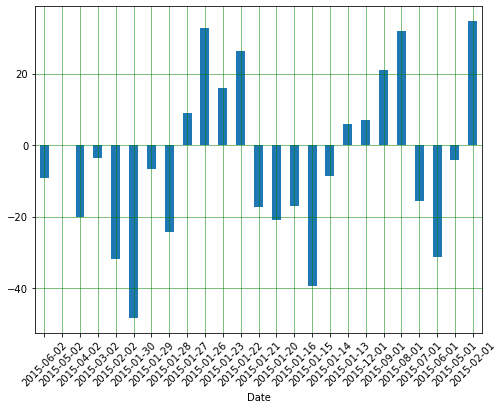

In [21]:
# Create a dataframe that output the Date, the Actual and the predicted values
df1 = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df2 = df1.tail(25)
 
# set the date with string format for plotting
df2['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df2.set_index('Date',inplace=True)
 
error = df2['Actual'] - df2['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()


In [22]:
#R-square on model train & test sample
from sklearn.metrics import r2_score

#Model Train R-sq
model_predictions=lr.predict(X_train)
rsq_train = r2_score(Y_train, model_predictions)
print('R-sq:Model Train', rsq_train)

#Model test R-sq
rsq_test = r2_score(Y_test, close_predictions)
print('R-sq:Test', rsq_test)

R-sq:Model Train 0.9966686938151051
R-sq:Test 0.8255310382350818


In [23]:
# to store model
import pickle 

In [24]:
with open ('lr_pickle', 'wb') as f:
    pickle.dump(lr,f)

In [25]:
#load stored model to predict
with open ('lr_pickle', 'rb') as f:
    mp = pickle.load(f)

In [26]:
mp.predict(X_test)

array([2073.82436617, 2074.36625053, 2068.35637558, 2051.39475159,
       2043.53411608, 2039.56623936, 2034.86382593, 2031.87508165,
       2018.89135959, 2015.15437709, 2013.92827717, 2012.72970456,
       2015.18594503, 2010.72649014, 2000.49710797, 1997.13662688,
       1985.96264855, 1966.91699814, 1955.16826379, 1933.76296573,
       1922.71051208, 1928.68596012, 1934.29713899, 1936.31985827,
       1942.89945049, 1950.31787176, 1960.17573711, 1973.70841135,
       1981.93231346, 1984.56439518, 1974.59490219, 1968.04164041,
       1961.31772887, 1956.6415653 , 1961.34625825, 1947.96463594,
       1948.44899882, 1946.31189213, 1939.43981637, 1949.95981393,
       1959.60063627, 1971.26243563, 1962.61251778, 1932.46951823,
       1924.31470409, 1941.65443005, 1976.55778852, 2015.93038931,
       2043.79465516, 2067.31506857, 2075.24590204, 2077.28250255,
       2087.16481876, 2089.69747914, 2099.20393641, 2093.50577235,
       2096.59901181, 2101.82337973, 2102.55254554, 2106.58305

In [28]:
# to save model using joblib
import joblib
joblib.dump(lr, 'model_joblib')


['model_joblib']

In [29]:
# to load & predict using joblib
mj = joblib.load('model_joblib')

mj.predict (X_test)

array([2073.82436617, 2074.36625053, 2068.35637558, 2051.39475159,
       2043.53411608, 2039.56623936, 2034.86382593, 2031.87508165,
       2018.89135959, 2015.15437709, 2013.92827717, 2012.72970456,
       2015.18594503, 2010.72649014, 2000.49710797, 1997.13662688,
       1985.96264855, 1966.91699814, 1955.16826379, 1933.76296573,
       1922.71051208, 1928.68596012, 1934.29713899, 1936.31985827,
       1942.89945049, 1950.31787176, 1960.17573711, 1973.70841135,
       1981.93231346, 1984.56439518, 1974.59490219, 1968.04164041,
       1961.31772887, 1956.6415653 , 1961.34625825, 1947.96463594,
       1948.44899882, 1946.31189213, 1939.43981637, 1949.95981393,
       1959.60063627, 1971.26243563, 1962.61251778, 1932.46951823,
       1924.31470409, 1941.65443005, 1976.55778852, 2015.93038931,
       2043.79465516, 2067.31506857, 2075.24590204, 2077.28250255,
       2087.16481876, 2089.69747914, 2099.20393641, 2093.50577235,
       2096.59901181, 2101.82337973, 2102.55254554, 2106.58305